25


pandas.core.series.Series

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([[ 6.56683043],
       [ 7.3160808 ],
       [ 6.47231585],
       [ 6.01679757],
       [ 6.78723062],
       [ 6.56683043],
       [ 5.76778834]])

[[ 7.2]
 [ 7.7]
 [ 6.3]
 [ 6.1]
 [ 7.8]
 [ 7.9]
 [ 5. ]]


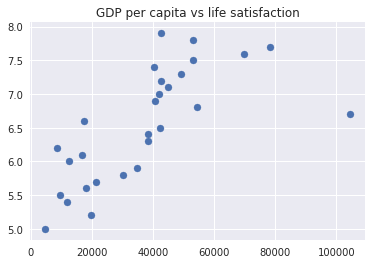

In [8]:
%matplotlib inline
import sklearn
import sklearn.linear_model
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




link='http://www.imf.org/external/pubs/ft/weo/2016/01/weodata/weorept.aspx?pr.x=60&pr.y=13&sy=2016&ey=2016&scsm=1&ssd=1&sort=country&ds=.&br=1&c=512%2C672%2C914%2C946%2C612%2C137%2C614%2C546%2C311%2C962%2C213%2C674%2C911%2C676%2C193%2C548%2C122%2C556%2C912%2C678%2C313%2C181%2C419%2C867%2C513%2C682%2C316%2C684%2C913%2C273%2C124%2C868%2C339%2C921%2C638%2C948%2C514%2C943%2C218%2C686%2C963%2C688%2C616%2C518%2C223%2C728%2C516%2C558%2C918%2C138%2C748%2C196%2C618%2C278%2C624%2C692%2C522%2C694%2C622%2C142%2C156%2C449%2C626%2C564%2C628%2C565%2C228%2C283%2C924%2C853%2C233%2C288%2C632%2C293%2C636%2C566%2C634%2C964%2C238%2C182%2C662%2C359%2C960%2C453%2C423%2C968%2C935%2C922%2C128%2C714%2C611%2C862%2C321%2C135%2C243%2C716%2C248%2C456%2C469%2C722%2C253%2C942%2C642%2C718%2C643%2C724%2C939%2C576%2C644%2C936%2C819%2C961%2C172%2C813%2C132%2C199%2C646%2C733%2C648%2C184%2C915%2C524%2C134%2C361%2C652%2C362%2C174%2C364%2C328%2C732%2C258%2C366%2C656%2C734%2C654%2C144%2C336%2C146%2C263%2C463%2C268%2C528%2C532%2C923%2C944%2C738%2C176%2C578%2C534%2C537%2C536%2C742%2C429%2C866%2C433%2C369%2C178%2C744%2C436%2C186%2C136%2C925%2C343%2C869%2C158%2C746%2C439%2C926%2C916%2C466%2C664%2C112%2C826%2C111%2C542%2C298%2C967%2C927%2C443%2C846%2C917%2C299%2C544%2C582%2C941%2C474%2C446%2C754%2C666%2C698%2C668&s=NGDPDPC&grp=0&a='

page=requests.get(link)
l=pd.read_html(page.text)
df=l[4]

df=df.loc[2:, [0,5]]
df.columns=['Country' ,'gdp_2016']
df.set_index('Country', inplace=True)
sns.set()

#download CSV file from http://stats.oecd.org/index.aspx?DataSetCode=BLI
lsi=pd.read_csv('BLI_11112017171257222.csv')
lsi=lsi[lsi.Indicator.str.contains('Life satisfaction')]
#lsi
lsi=lsi[['Country', 'Value']].set_index('Country')
lsi.drop_duplicates(keep='first', inplace=True)
print(len(lsi.index.unique()))
#lsi.head()
#df.head()

lsi['gdp_2016']=0
count=0
for idx, value in lsi.Value.iteritems():
    if idx in df.index:
        #lsi[idx, 'gdp2016'] = df[idx, 'gdp2016']
        lsi.loc[idx,'gdp_2016'] = df.loc[idx, 'gdp_2016']
        count=count+1

lsi.drop(lsi['gdp_2016'] == 0, inplace=True)
lsi.columns=['life_satisfaction', 'gdp_2016' ]
#lsi.sort_values(by=['life_satisfaction'], ascending=False, inplace=True)

dupcontries=['South Africa', 'Hungary', 'Portugal']
for c in dupcontries:
    lsi.loc[c, 'life_satisfaction']=lsi.loc[c].life_satisfaction.max()

lsi.drop_duplicates(keep='first', inplace=True )
X=lsi['gdp_2016']
y=lsi['life_satisfaction']

plt.title("GDP per capita vs life satisfaction")
#plt.legend()
plt.scatter(X, y)
#plt.xlabel("GDP per capita in $")
#plt.ylabel("Life Satisfaction")
trainingX=X[:-7]
testingX=X[-7:]
trainingy=y[:-7]
testingy=y[-7:]
type(trainingX)
# select a model

model = sklearn.linear_model.LinearRegression()

model.fit(trainingX.values.reshape(-1,1), trainingy.values.reshape(-1,1))
model.predict(testingX.values.reshape(-1,1))
print (testingy.values.reshape(-1,1))



